# Assignment 3

## Problem 1

### (A)
Make a figure where the y-axis shows the name of each asteroid, and the x-axis shows the density. Plot the density of each asteroid in this figure and include the uncertainty in the density as error bars.

In [130]:
# Imports
import math
import numpy as np
import scipy.stats
import statsmodels.api as sm
from astroML.plotting import hist
from matplotlib import mlab, pyplot as plt

%matplotlib inline

In [131]:
def toFloat(string):
    try:
        return float(string)
    except:
        return 0.0

# Import the data from the file
data = [[], [], [], []]
with open('asteroid_dens.dat') as f:
    for i, line in enumerate(f):
        if i > 0:
            fields = list(filter(None, line.split()))
            for j in range(0,3):
                data[j].append(fields[j+1])

# Convert data to the proper format
for i in range(1,3):
    data[i] = [toFloat(x) for x in data[i]]

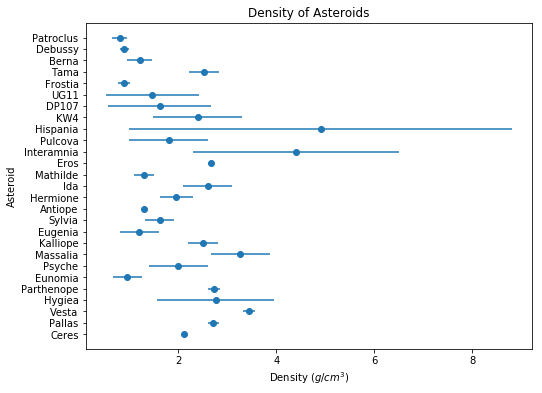

In [132]:
# Plot data
plt.figure(figsize=(8,6))
plt.errorbar(data[1], range(0,len(data[1])), marker = 'o', xerr = data[2], ls = 'none')
plt.yticks(range(0,len(data[1])), data[0])
plt.tick_params(axis='y', which='minor', pad=15)
plt.xlabel(r"Density ($g/cm^3$)")
plt.ylabel(r"Asteroid")
plt.title("Density of Asteroids");

### (B)
Plot box and whisker plots for the density measurement and the density error.

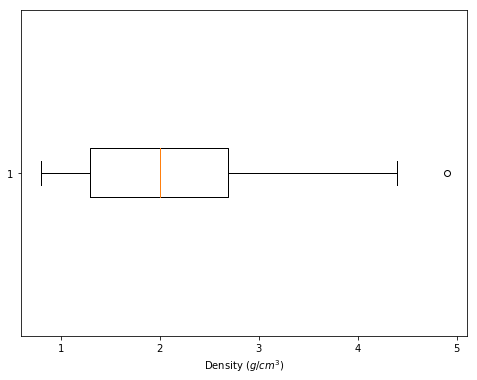

In [133]:
plt.figure(figsize=(8,6))
plt.boxplot(data[1], vert = False)
plt.xlabel("Density ($g/cm^3$)");

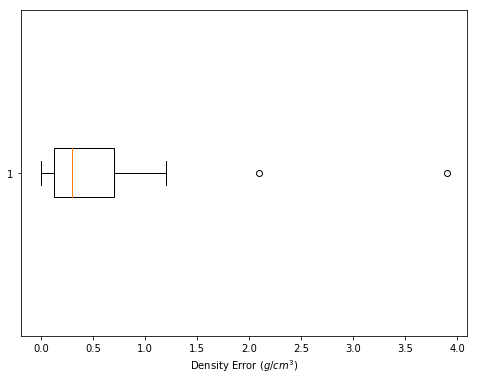

In [134]:
plt.figure(figsize=(8,6))
plt.boxplot(data[2], vert = False)
plt.xlabel("Density Error ($g/cm^3$)");

## (c)
These plots indicate the qartiles for density and density error. It shows us that there are a few outliers in the data, but for the most part the samples are pretty reasonable.

### (d) Despite the fact that a sample may appear normal (i.e., Gaussian-like) one can investigate further whether some deviation form normality is present. In this example one might want to do this to verify the possibility that subpopulations of asteroids are present in the sample, due to, for example di erent structure (solid vs. porous) and composition (rock vs. ice). One can do this first visually using a normal probability plot (see scipy.stats.probplot). Plot a normal probability plot of the data and describe what you see.

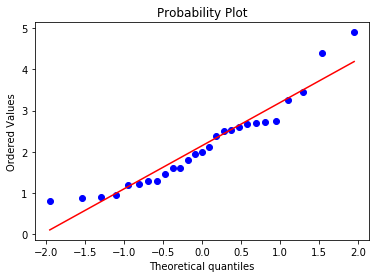

In [135]:
fig = plt.figure()
ax = fig.add_subplot(111)
normal_plot = scipy.stats.probplot(data[1], plot = ax)

Our plot indicates that a normal distribution is a reasonably good, fit, but the error towards the ends of our qq plot indicate that our data may be right-skewed.

### (e)
One can also use statistical tests to investigate this. Use the following three different tests to test the “normality” of the sample:
- Anderson-Darling 
- Shapiro-Wilk
- Lilliefors test

In [136]:
print("Assume alpha = 0.01, H_0 is the hypothesis that data are normal.\n")

# Anderson Darling Test
A, crit, sig = scipy.stats.anderson(data[1])
print("Anderson:\tA^2 =",A,"with a critical value of", float(crit[-1:]))
print("Since A^2 is less than the critical value for alpha, we fail to reject H_0.\n")

# Shapiro Test
W, p = scipy.stats.shapiro(data[1])
print("Shapiro:\tW =",round(W,3),"with a p-value of",round(p,3))
print("Since p is greater than alpha, we fail to reject H_0.\n")

# Lilliefors Test (critical value = 0.2 for alpha = 0.01 and len = 27, from http://www.statisticshowto.com/wp-content/uploads/2016/03/table-for-Lilliefors.pdf)
d_ks, p = sm.stats.lilliefors(data[1])
print("Lilliefors:\tD =",round(d_ks,3),"with a critical value of 0.200")
print("Since D is less than the critical value for alpha, we fail to reject H_0.\n")

Assume alpha = 0.01, H_0 is the hypothesis that data are normal.

Anderson:	A^2 = 0.5491060977391946 with a critical value of 0.98
Since A^2 is less than the critical value for alpha, we fail to reject H_0.

Shapiro:	W = 0.925 with a p-value of 0.051
Since p is greater than alpha, we fail to reject H_0.

Lilliefors:	D = 0.13 with a critical value of 0.200
Since D is less than the critical value for alpha, we fail to reject H_0.



In all cases, we fail to reject the null hypothesis $H_0$ that our data came from a normal distribution.

## (f) What can you conclude with regards to the existence of subpopulations in this sample?

Since we have failed to reject the hypothesis that our data came from a normal distribution, we conclude that it is unlikely that there exist subpopulations in the sample whose parent distributions are distinct from a parent Gaussian.

## Problem 2

Use the same data we used in Lab 4 (glob_clus.dat), which can be downloaded from the Canvas site. This  le contains 81 Globular Clusters (GCs) from our Milky Way Galaxy (MW) and 360 GCs from the nearest large spiral galaxy, the Andromeda Galaxy (M31). The  rst and second columns are GC name and K-band magnitude, respectively. For the MW, absolute magnitudes are given. For M 31, apparent magnitudes are given. In order to convert the M31 GCs apparent magnitudes to absolute magnitudes (i.e., in order to put them in the same scale as the MW GCs) you need to subtract 24.44 from the apparent magnitude of the M31 GCs.

### (a) Plot the distributions of both GCs.

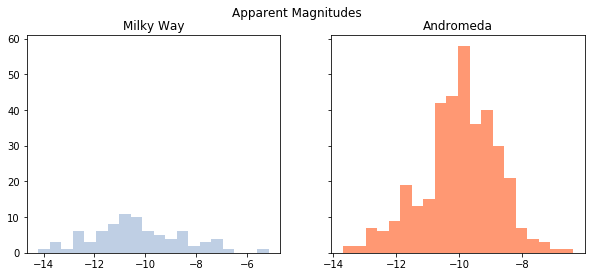

In [137]:
MWGC = [[], [], []]
AGC = [[], []]

# Read data from files
with open("MWGC.dat") as f:
    for line in f:
        fields = line.split()
        for j in range(0,3):
            MWGC[j].append(fields[j])

with open("AndromedaGC.dat") as f:
    for line in f:
        fields = line.split()
        for j in range(0,2):
            AGC[j].append(fields[j])

# Convert data to proper types
MWGC[2] = [float(x) for x in MWGC[2]]
AGC[1] = [float(x) - 24.44 for x in AGC[1]]

# Plot the figures
f, (ax1,ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4))
ax1.hist(MWGC[2], bins=20, color = "lightsteelblue", alpha = 0.8);
ax1.set_title("Milky Way")
ax2.hist(AGC[1], bins=20, color = "coral", alpha = 0.8);
ax2.set_title("Andromeda");
f.suptitle("Apparent Magnitudes");

### (b) Estimate the sample mean and the variance for both samples and give their 99% confidence intervals (you can assume that the samples come from a parent Gaussian distribution).

In [138]:
# Get values for the variance and mean for both distributions
Andromeda_vals = (np.mean(AGC[1]), np.var(AGC[1]))
MW_vals = (np.mean(MWGC[2]), np.var(MWGC[2]))

# Calculate confidence intervals
lambd = 2.58 # Value from wikipedia
mw_ci = (MW_vals[0] - lambd*math.sqrt(MW_vals[1]), MW_vals[0] + lambd*math.sqrt(MW_vals[1]))
mw_ci = [round(x,3) for x in mw_ci]
ad_ci = (Andromeda_vals[0] - lambd*math.sqrt(Andromeda_vals[1]), Andromeda_vals[0] + lambd*math.sqrt(Andromeda_vals[1]))
ad_ci = [round(x,3) for x in ad_ci]

print("Data from the Milky Way:")
print("Mean:\t\t", round(MW_vals[0], 3))
print("Variance:\t", round(MW_vals[1],3))
print("99% Conf. Int.:\t", mw_ci,"\n")

print("Data from Andromeda:")
print("Mean:\t\t", round(Andromeda_vals[0],3))
print("Variance:\t", round(Andromeda_vals[1],3))
print("99% Conf. Int.:\t", ad_ci)

Data from the Milky Way:
Mean:		 -10.324
Variance:	 3.213
99% Conf. Int.:	 [-14.948, -5.699] 

Data from Andromeda:
Mean:		 -9.982
Variance:	 1.423
99% Conf. Int.:	 [-13.06, -6.904]


### (c) Estimate the standard deviation in the mean and the population variance using:
- the jackknife method
- the bootstrap method

Bootstrapped Data from the Milky Way:
Mean:		 -10.322
Variance:	 3.167
99% Conf. Int.:	 [-14.914, -5.731] 

Bootsrapped Data from Andromeda:
Mean:		 -9.982
Variance:	 1.419
99% Conf. Int.:	 [-13.055, -6.908] 



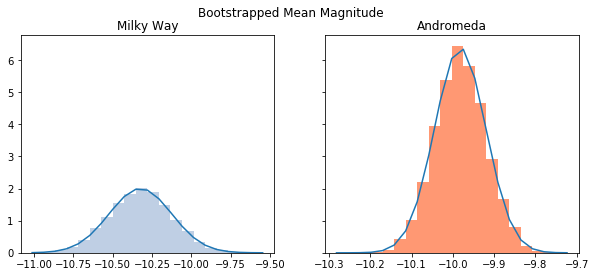

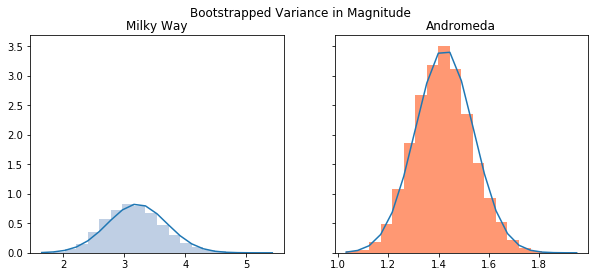

In [139]:
def gaussian(x, mu, sigma):
    return 1/math.sqrt(2 * 3.1415 * sigma**2) * (2.71828)**(-(x-mu)**2 / (2 * sigma**2))

# Bootstrap Sampling (mean, var)
bt_Andromeda_samples = [[], []]
bt_MilkyWay_samples = [[], []]

np.random.seed(1337)
N = 10**4

for i in range(N):
    sample_MW = np.random.choice(MWGC[2], len(MWGC[2]))
    sample_AD = np.random.choice(AGC[1], len(AGC[1]))
    bt_Andromeda_samples[0].append(np.mean(sample_AD))
    bt_Andromeda_samples[1].append(np.var(sample_AD))
    bt_MilkyWay_samples[0].append(np.mean(sample_MW))
    bt_MilkyWay_samples[1].append(np.var(sample_MW))
    
# Plot the mean data
f, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4));

n, bins, err = ax1.hist(bt_MilkyWay_samples[0], bins=20, normed=True, color = 'lightsteelblue', alpha = 0.8);
ax1.plot(bins, matplotlib.mlab.normpdf(bins, MW_vals[0], np.sqrt(np.var(bt_MilkyWay_samples[0]))));
ax1.set_title("Milky Way");

n, bins, err = ax2.hist(bt_Andromeda_samples[0], normed=True, bins = 20, color = 'coral', alpha = 0.8);
ax2.plot(bins, matplotlib.mlab.normpdf(bins, Andromeda_vals[0], np.sqrt(np.var(bt_Andromeda_samples[0]))));
ax2.set_title("Andromeda");

f.suptitle("Bootstrapped Mean Magnitude");

# Plot the variance data
f1, (ax3, ax4) = plt.subplots(1,2,sharey=True,figsize=(10,4));

n, bins, err = ax3.hist(bt_MilkyWay_samples[1], bins=20, normed=True, color = 'lightsteelblue', alpha = 0.8);
ax3.plot(bins, matplotlib.mlab.normpdf(bins, MW_vals[1], np.sqrt(np.var(bt_MilkyWay_samples[1]))));
ax3.set_title("Milky Way");

n, bins, err = ax4.hist(bt_Andromeda_samples[1], bins=20, normed=True, color = 'coral', alpha = 0.8);
ax4.plot(bins, matplotlib.mlab.normpdf(bins, Andromeda_vals[1], np.sqrt(np.var(bt_Andromeda_samples[1]))));
ax4.set_title("Andromeda");

f1.suptitle("Bootstrapped Variance in Magnitude");

Andromeda_bootstrap_vals = (np.mean(bt_Andromeda_samples[0]), np.mean(bt_Andromeda_samples[1]))
MilkyWay_bootstrap_vals = (np.mean(bt_MilkyWay_samples[0]), np.mean(bt_MilkyWay_samples[1]))

# Calculate confidence intervals
lambd = 2.58 # Value from wikipedia
mw_ci = (MilkyWay_bootstrap_vals[0] - lambd*np.sqrt(MilkyWay_bootstrap_vals[1]), MilkyWay_bootstrap_vals[0] + lambd*np.sqrt(MilkyWay_bootstrap_vals[1]))
mw_ci = [round(x,3) for x in mw_ci]
ad_ci = (Andromeda_bootstrap_vals[0] - lambd*np.sqrt(Andromeda_bootstrap_vals[1]), Andromeda_bootstrap_vals[0] + lambd*np.sqrt(Andromeda_bootstrap_vals[1]))
ad_ci = [round(x,3) for x in ad_ci]

print("Bootstrapped Data from the Milky Way:")
print("Mean:\t\t", round(MilkyWay_bootstrap_vals[0], 3))
print("Variance:\t", round(MilkyWay_bootstrap_vals[1],3))
print("99% Conf. Int.:\t", mw_ci,"\n")

print("Bootsrapped Data from Andromeda:")
print("Mean:\t\t", round(Andromeda_bootstrap_vals[0],3))
print("Variance:\t", round(Andromeda_bootstrap_vals[1],3))
print("99% Conf. Int.:\t", ad_ci,"\n")

Jackknifed Data from the Milky Way:
Mean:		 -10.324
Variance:	 3.212
99% Conf. Int.:	 [-14.948, -5.7] 

Jackknifed Data from Andromeda:
Mean:		 -9.982
Variance:	 1.423
99% Conf. Int.:	 [-13.06, -6.904] 



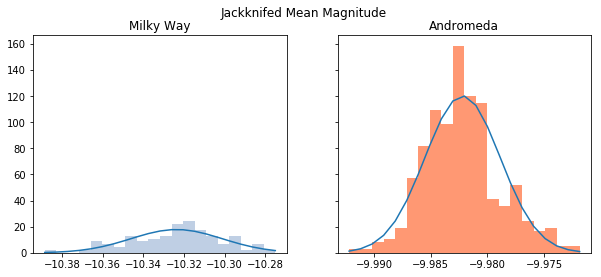

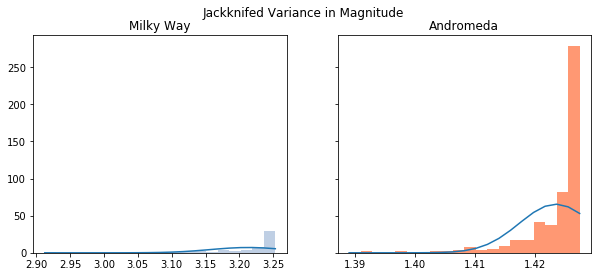

In [140]:
# Jackknife Sampling (mean, var)
MW_jackknife_samples = [[], []]
AD_jackknife_samples = [[], []]

for i in range(len(AGC[1])): # Andromeda Data
    AD_jackknife_samples[0].append(np.mean(AGC[1][:i] + AGC[1][i+1:]))
    AD_jackknife_samples[1].append(np.var(AGC[1][:i] + AGC[1][i+1:]))

for i in range(len(MWGC[2])): # Milky Way Data
    MW_jackknife_samples[0].append(np.mean(MWGC[2][:i] + MWGC[2][i+1:]))
    MW_jackknife_samples[1].append(np.var(MWGC[2][:i] + MWGC[2][i+1:]))

# Plot the mean data
f, (ax1, ax2) = plt.subplots(1,2,sharey=True,figsize=(10,4));

n, bins, err = ax1.hist(MW_jackknife_samples[0], bins=20, normed=True, color = 'lightsteelblue', alpha = 0.8);
ax1.plot(bins, matplotlib.mlab.normpdf(bins, MW_vals[0], np.sqrt(np.var(MW_jackknife_samples[0]))));
ax1.set_title("Milky Way");

n, bins, err = ax2.hist(AD_jackknife_samples[0], normed=True, bins = 20, color = 'coral', alpha = 0.8);
ax2.plot(bins, matplotlib.mlab.normpdf(bins, Andromeda_vals[0], np.sqrt(np.var(AD_jackknife_samples[0]))));
ax2.set_title("Andromeda");

f.suptitle("Jackknifed Mean Magnitude");

# Plot the variance data
f1, (ax3, ax4) = plt.subplots(1,2,sharey=True,figsize=(10,4));

n, bins, err = ax3.hist(MW_jackknife_samples[1], bins=20, normed=True, color = 'lightsteelblue', alpha = 0.8);
ax3.plot(bins, matplotlib.mlab.normpdf(bins, MW_vals[1], np.sqrt(np.var(MW_jackknife_samples[1]))));
ax3.set_title("Milky Way");

n, bins, err = ax4.hist(AD_jackknife_samples[1], bins=20, normed=True, color = 'coral', alpha = 0.8);
ax4.plot(bins, matplotlib.mlab.normpdf(bins, Andromeda_vals[1], np.sqrt(np.var(AD_jackknife_samples[1]))));
ax4.set_title("Andromeda");

f1.suptitle("Jackknifed Variance in Magnitude");

Andromeda_jkn_vals = (np.mean(AD_jackknife_samples[0]), np.mean(AD_jackknife_samples[1]))
MilkyWay_jkn_vals = (np.mean(MW_jackknife_samples[0]), np.mean(MW_jackknife_samples[1]))

# Calculate confidence intervals
lambd = 2.58 # Value from wikipedia
mw_ci = (MilkyWay_jkn_vals[0] - lambd*np.sqrt(MilkyWay_jkn_vals[1]), MilkyWay_jkn_vals[0] + lambd*np.sqrt(MilkyWay_jkn_vals[1]))
mw_ci = [round(x,3) for x in mw_ci]
ad_ci = (Andromeda_jkn_vals[0] - lambd*np.sqrt(Andromeda_jkn_vals[1]), Andromeda_jkn_vals[0] + lambd*np.sqrt(Andromeda_jkn_vals[1]))
ad_ci = [round(x,3) for x in ad_ci]

print("Jackknifed Data from the Milky Way:")
print("Mean:\t\t", round(MilkyWay_jkn_vals[0], 3))
print("Variance:\t", round(MilkyWay_jkn_vals[1],3))
print("99% Conf. Int.:\t", mw_ci,"\n")

print("Jackknifed Data from Andromeda:")
print("Mean:\t\t", round(Andromeda_jkn_vals[0],3))
print("Variance:\t", round(Andromeda_jkn_vals[1],3))
print("99% Conf. Int.:\t", ad_ci,"\n")

Unsuprisingly, using the Bootstrap method gave us a much more "Gaussian-like" distribution for our estimates of the mean and variance of the data than the Jackknife method did. In both cases, we get rather similar results for the sample mean, variance, and the 99% confidence interval for the sample mean. With our original data, we estimate the population mean to be $\hat{\mu} \approx -10.324$ for the Milky Way, with a variance of $\hat{\sigma} \approx 3.213$, and a 99% confidence interval for the mean of $-14.948$ to $-5.699$. Using the Bootstrap method, we estimate the population mean to be $\hat{\mu} \approx -10.322$, with a slightly smaller variance of $\hat{\sigma} \approx 3.167$, and a slightly tighter 99% confidence interval for the mean of $-14.914$ to $-5.731$. Using the Jackknife method, we estimate the population mean to be $\hat{\mu} \approx -10.324$ (exactly the same as our original data set), with a variance of $\hat{\sigma} \approx 3.212$, and a 99% confidence interval for the mean of $-14.948$ to $-5.7$. For the Andromeda Galaxy, the results are very similar. Notably, the results for the Jackknife estimates and the original data set are almost *exactly* identical.

One interesting thing of note is that the variances of the Jackknife samples do not follow an approximately normal distribution, which the variances of the Bootstrap samples do. This is to be expected; since we are *only removing* samples in the Jackknife method, the variance of our Jackknife samples must be smaller than that of the original sample distribution. By contrast, the variances of the Bootstrap samples may be larger or small than that of the original sample data, but the mean is still close to the original sample variance.

### (d) 
Use the Anderson-Darling and Shapiro-Wilk tests to explore whether the distribution of magnitudes in both the MW and M31 have a Gaussian distribution

In [141]:
# Milky Way

# Anderson Test
A, crit, sig = scipy.stats.anderson(MWGC[2])

# Shapiro-Wilks Test
W, p = scipy.stats.shapiro(MWGC[2])

## Print out values
print("Assume alpha = 0.01, H_0 is the hypothesis that data are normal\n")

print("Anderson Test for Milky Way:\t", round(A,3),"with a critical value of",float(crit[-1:]))
print("\nSince A^2 is less than the critical\nvalue for alpha = 0.01, we fail\nto reject H_0.\n")
print("Shapiro Test for Milky Way:\t", round(W,3), "with a p-value of",round(p,3))
print("\nSince p is greater than alpha, we fail to reject H_0.")
######################################################
print("\n")

# Andromeda
A, crit, sig = scipy.stats.anderson(AGC[1])

# Shapiro-Wilks Test
W, p = scipy.stats.shapiro(AGC[1])

## Print out the values
print("Anderson Test for Andromeda:\t", round(A,3),"with a critical value of",float(crit[-1:]))
print("\nSince A^2 is greater than the critical\nvalue for alpha = 0.01, we reject H_0.\n")
print("Shapiro Test for Andromeda:\t", round(W,3), "with a p-value of",round(p,3))
print("\nSince p is less than alpha, we reject H_0.")

Assume alpha = 0.01, H_0 is the hypothesis that data are normal

Anderson Test for Milky Way:	 0.303 with a critical value of 1.044

Since A^2 is less than the critical
value for alpha = 0.01, we fail
to reject H_0.

Shapiro Test for Milky Way:	 0.988 with a p-value of 0.675

Since p is greater than alpha, we fail to reject H_0.


Anderson Test for Andromeda:	 1.794 with a critical value of 1.08

Since A^2 is greater than the critical
value for alpha = 0.01, we reject H_0.

Shapiro Test for Andromeda:	 0.985 with a p-value of 0.001

Since p is less than alpha, we reject H_0.


Using both the Anderson-Darling and Shapiro-Wilk tests, we fail to reject the null hypothesis $H_0$ that our data is normally distributed in the case of the Milky Way, while rejecting it in the case of M31.

## Problem 3

The $Z_1$ test statistic, given by $$ Z_1 = \frac{|\mu-q_{50}|}{\sigma_G}\sqrt{N}, $$
measures the difference between the mean and median values from a given distribution. In a Gaussian distribution, these values are equal, so we expect that if our data is drawn from such a distribution then $Z_1 \approx 0$; on the other hand, if our data exhibit a $Z_1 \gg 0$, then it can indicate that our parent distribution is not Gaussian.

The $Z_2$ statistic is a measure of how close the sample $s$ and population $\sigma_G$ standard deviations are. $Z_2 \propto s/\sigma_G$, so when $Z_2 \gg 1$, it indicates that there may be significant outliers in the data, and that the parent distribution of the sample is likely not Gaussian.

$Z$ statistics are particularly useful when you data is nearly normal, but has outliers that would otherwise throw other tests off.

In [142]:
# Milky Way

## From the code referenced in fig. 4.7
from astroML.stats import mean_sigma, median_sigmaG

mu, sigma = mean_sigma(MWGC[2], ddof=1)
median, sigmaG = median_sigmaG(MWGC[2])

N = len(MWGC[2])
Z1 = 1.3 * abs(mu - median) / sigma * np.sqrt(N)
Z2 = 1.1 * abs(sigma / sigmaG - 1) * np.sqrt(N)

print("Milky Way:")
print("Z_1:\t",Z1)
print("Z_2:\t",Z2,"\n")

# Andromeda

mu, sigma = mean_sigma(AGC[1], ddof=1)
median, sigmaG = median_sigmaG(AGC[1])

N = len(AGC[1])
Z1 = 1.3 * abs(mu - median) / sigma * np.sqrt(N)
Z2 = 1.1 * abs(sigma / sigmaG - 1) * np.sqrt(N)

print("M31:")
print("Z_1:\t",Z1)
print("Z_2:\t",Z2)

Milky Way:
Z_1:	 1.5140719998436984
Z_2:	 0.6688373904120372 

M31:
Z_1:	 1.6864778522822004
Z_2:	 1.8955972303101798


## Problem 4

Upload the file “radio_pointings.dat”
This file has two data sets, one with a total of 386 measurements, the other with a total of 290 observations. The former includes measurements of the radio flux density (in mJy) at the position of a specified set of galaxies (detected in the optical); the latter is of flux densities (in mJy) measured at random positions in the sky.

### (a) 
plot the data using two histograms using one of the rules of thumb for plotting histograms described in Sec. 4.8.1 of the AstroML book. Indicate which of the rules of thumb you used.

In [143]:
rfd_random = []
rfd_specif = []

# Read data into lists as floats
with open("radio_pointings.dat") as f:
    for i, line in enumerate(f):
        if i in range(2,41): # Specific Galaxies
            [rfd_specif.append(float(x)) for x in line.split()]
        elif i in range(43,73): # Random Galaxies
            [rfd_random.append(float(x)) for x in line.split()]

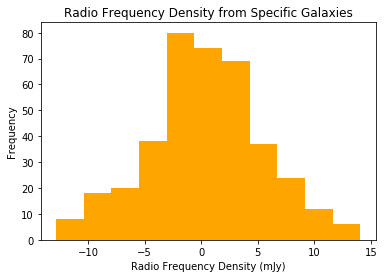

In [144]:
## Plot Data From Specific Galaxies
hist(rfd_specif, bins='scott', color="orange");
plt.title("Radio Frequency Density from Specific Galaxies");
plt.xlabel("Radio Frequency Density (mJy)");
plt.ylabel("Frequency");

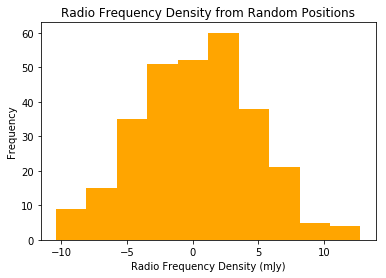

In [145]:
## Plot Data From Random Galaxies
hist(rfd_random, bins='scott', color= "orange");
plt.title("Radio Frequency Density from Random Positions");
plt.xlabel("Radio Frequency Density (mJy)");
plt.ylabel("Frequency");

These histograms were plotted according to the 'Scott' rule of determining bin width.

### (b) 
Use at least two of the tests we learned in class to test whether there is a statistically significant measurement of radio emission excesses towards the galaxy positions.

99% Confidence Interval for Difference in the Dean:	 (-0.8252877583216377, 1.0740403865653396)


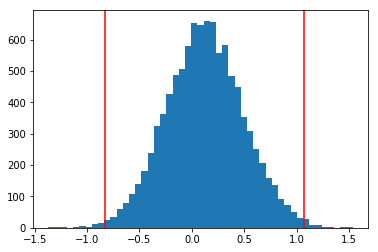

In [146]:
## Test 1: Bootstrap the data
N = 10**4

diff_means = []

np.random.seed(1337)
for i in range(N):
    gal_samples = np.random.choice(rfd_specif, len(rfd_specif))
    ran_samples = np.random.choice(rfd_random, len(rfd_random))
    diff_means.append(np.mean(gal_samples) - np.mean(ran_samples))
    
# Find the 99% Confidence Interval
lambd = 2.58
diff_ci = (np.mean(diff_means) - lambd*np.sqrt(np.var(diff_means)), np.mean(diff_means) + lambd*np.sqrt(np.var(diff_means)))

# Plot the data
plt.hist(diff_means, bins='scott');
plt.axvline(diff_ci[0], color = 'red'); # Show the 99% confidence interval
plt.axvline(diff_ci[1], color = 'red');

print("99% Confidence Interval for Difference in the Dean:\t",diff_ci)

First, we do a Bootstrap test to find the difference in the sample means between data measure in the direction of galaxies and data measured in random directions. We take $10^4$ random samples with replacement of both groups, calculate the mean of each, and calculate the difference between the galaxy samples and the random samples. We then find our confidence interval for the difference in the sample means. We fix an $\alpha$ of $0.01$, and formulate the null hypothesis $H_0$ that the difference in the means is not statistically significant (i.e., $0$), which would support the affirmation that the data sets came from the same parent distributions. Our data show that, with 99% confidence, the mean of a sample distribution will lie in the range $-0.825, 1.074$. Since this confidence interval contains $0$, we fail to reject the null hypothesis and conclude that there is no evidence for a statistically significant difference.

In [147]:
## Test 2: K-S Test
D, p = scipy.stats.ks_2samp(rfd_specif, rfd_random)
crit = 1.95 * math.sqrt((len(rfd_specif) + len(rfd_random)) / float(len(rfd_specif)*len(rfd_random)))

print("Assume alpha = 0.01, H_0 is the hypothesis that the distributions are drawn from the same parent.")
print("KS Test Statistic:\t",round(D,3),"with a critical value of",round(crit,3))
print("Since D < c(alpha), we fail to reject H_0.")

Assume alpha = 0.01, H_0 is the hypothesis that the distributions are drawn from the same parent.
KS Test Statistic:	 0.067 with a critical value of 0.152
Since D < c(alpha), we fail to reject H_0.


Using a two-sided K-S test, we test the null hypothesis $H_0$ that the two samples came from a different parent distribution. We calculate the K-S test statistic $D \approx 0.067$ and the associated critical value $c(\alpha = 0.01) \approx 0.152$, and check if $D > c(\alpha)$; since $D < c(\alpha)$, we cannot say that the two distributions are statistically different, and so we fail to reject the null hypothesis. This, of course, can't tell us with certainty that the two samples *did* come from the same distribution, but it does tell us that we can't say that they *didn't*.